### Data Wrangling 

Real-world data is often not in a form that can be accepted by tools for data analysis.

Why?
    - Due to glitches
    - Data-entry errors
    - Lack of standardization, or evolving standards
    - Malicious activity

How? 
     - Has missing or corrupt values -> data cleaning
     - Has outliers (observations that deviate so much from others to seem they were generated 
        by a different mechanism) -> outlier detection
     - Is in an unsuitable format -> data wrangling

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### Property crimes from Bureau of Justice Statistics
Adapted from http://vis.stanford.edu/wrangler/.

In [2]:
crime = pd.read_csv('crime.csv', header=None)
crime

,0,1
0,Reported crime in Alabama,NaN
1,NaN,NaN
2,2004,4029.3
3,2005,3900.0
4,2006,3937.0
...,...,...
402,2004,3338.5
403,2005,3158.0
404,2006,2989.1
405,2007,2883.2


In [3]:
crime.columns = ['year', 'crimerate']
crime

,year,crimerate
0,Reported crime in Alabama,NaN
1,NaN,NaN
2,2004,4029.3
3,2005,3900.0
4,2006,3937.0
...,...,...
402,2004,3338.5
403,2005,3158.0
404,2006,2989.1
405,2007,2883.2


In [4]:
(crime.year.isnull() & crime.crimerate.isnull())

0      False
1       True
2      False
3      False
4      False
       ...  
402    False
403    False
404    False
405    False
406    False
Length: 407, dtype: bool

In [6]:
crime.drop(crime[(
                crime.year.isnull() & 
                crime.crimerate.isnull())
                ].index,
           axis=0, inplace=True)
crime

,year,crimerate
0,Reported crime in Alabama,NaN
2,2004,4029.3
3,2005,3900.0
4,2006,3937.0
5,2007,3974.9
...,...,...
402,2004,3338.5
403,2005,3158.0
404,2006,2989.1
405,2007,2883.2


In [7]:
crime.year

0      Reported crime in Alabama
2                           2004
3                           2005
4                           2006
5                           2007
                 ...            
402                         2004
403                         2005
404                         2006
405                         2007
406                         2008
Name: year, Length: 306, dtype: object

In [8]:
crime.crimerate

0         NaN
2      4029.3
3      3900.0
4      3937.0
5      3974.9
        ...  
402    3338.5
403    3158.0
404    2989.1
405    2883.2
406    2724.2
Name: crimerate, Length: 306, dtype: float64

In [9]:
crime['state'] = crime.year.str.extract('.*in\s+(.*)', expand=False)
crime

,year,crimerate,state
0,Reported crime in Alabama,NaN,Alabama
2,2004,4029.3,NaN
3,2005,3900.0,NaN
4,2006,3937.0,NaN
5,2007,3974.9,NaN
...,...,...,...
402,2004,3338.5,NaN
403,2005,3158.0,NaN
404,2006,2989.1,NaN
405,2007,2883.2,NaN


In [10]:
crime.state.fillna(method = 'ffill', axis=0, inplace=True)
crime

,year,crimerate,state
0,Reported crime in Alabama,NaN,Alabama
2,2004,4029.3,Alabama
3,2005,3900.0,Alabama
4,2006,3937.0,Alabama
5,2007,3974.9,Alabama
...,...,...,...
402,2004,3338.5,Wyoming
403,2005,3158.0,Wyoming
404,2006,2989.1,Wyoming
405,2007,2883.2,Wyoming


In [11]:
crime.dropna(inplace=True)
crime

,year,crimerate,state
2,2004,4029.3,Alabama
3,2005,3900.0,Alabama
4,2006,3937.0,Alabama
5,2007,3974.9,Alabama
6,2008,4081.9,Alabama
...,...,...,...
402,2004,3338.5,Wyoming
403,2005,3158.0,Wyoming
404,2006,2989.1,Wyoming
405,2007,2883.2,Wyoming


In [12]:
crime = crime.pivot(index='state', columns='year', values='crimerate')
crime

year,2004,2005,2006,2007,2008
state,,,,,
Alabama,4029.3,3900.0,3937.0,3974.9,4081.9
Alaska,3370.9,3615.0,3582.0,3373.9,2928.3
Arizona,5073.3,4827.0,4741.6,4502.6,4087.3
Arkansas,4033.1,4068.0,4021.6,3945.5,3843.7
California,3423.9,3321.0,3175.2,3032.6,2940.3
Colorado,3918.5,4041.0,3441.8,2991.3,2856.7
Connecticut,2684.9,2579.0,2575.0,2470.6,2490.8
Delaware,3283.6,3118.0,3474.5,3427.1,3594.7
District of Columbia,4852.8,4490.0,4653.9,4916.3,5104.6


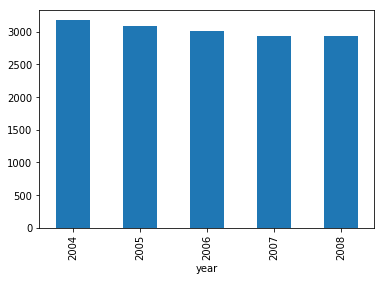

In [13]:
crime.loc['Illinois',:].plot(kind = 'bar')

### Home Mortgage Disclosure Act (HMDA) data

Based on a suggestion by Alden Golab

In [ ]:
hmda = pd.read_csv('hmda_small.csv')
hmda

In [ ]:
# Column 13 has census tract information, a 7 charater code dddd.dd
hmda["Census Tract Number"]

In [ ]:
hmda = pd.read_csv('hmda_small.csv',
                   dtype={"Census Tract Number": str})
hmda["Census Tract Number"]

In [ ]:
census_tract = hmda["Census Tract Number"]

In [ ]:
hmda[census_tract.str.len() < 7]["Census Tract Number"]

In [ ]:
missing_point = census_tract.str.contains("^[0-9]*$") #doesn't contain the point
missing_point

In [ ]:
hmda.loc[missing_point, "Census Tract Number"] = census_tract[missing_point] + ".00"


In [ ]:
hmda["Census Tract Number"].iloc[28]

In [ ]:
hmda["Census Tract Number"] = hmda["Census Tract Number"].str.rjust(7, "0")

In [ ]:
hmda[hmda["Census Tract Number"].str.len() < 7]

In [ ]:
hmda["Census Tract Number"]